In [24]:
# This exercise would reuse Mike's GD code, and apply it on the boston dataset
from sklearn import datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [25]:
bean = datasets.load_boston()
#print bean.DESCR

In [26]:
# Load boston data, and split into train and test sets
def load_boston():
    scaler = StandardScaler()
    boston = datasets.load_boston()
    X=boston.data
    y=boston.target
    X = scaler.fit_transform(X)
    return train_test_split(X,y)

In [27]:
X_train, X_test, y_train, y_test = load_boston()

In [28]:
# Normalize (z-score) all the features before running linear regression
def scaleData(z):
    mu = z.mean(axis=0)
    sigma = z.std(axis=0)
    z = (z - mu)/sigma
    return z, mu, sigma

In [29]:
# There is no need to do any splicing, as the train/test sets are available in separate variables
trainData = X_train

# Normalize the training dataset
trainData, mu, sigma = scaleData(trainData)

In [30]:
y = np.matrix(y_train) # Populate the target variable
y = y.T # and convert it into a column vector
X = np.matrix(trainData) # get the training data into X

In [31]:
#['data', 'feature_names', 'DESCR', 'target']
bean['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='|S7')

In [32]:
m = y.size

#Add a column of ones, size m, to X (interception data)
it = np.ones(shape=(m, 1))
X = np.append(it, X, 1)

In [33]:
# Calculate J(theta)
def compute_cost(X, y, theta):
    m = y.size
    y_hat = X.dot(theta)
    J = (1.0/2*m)* (y_hat - y).T.dot((y_hat - y)) # calculated as yhat - y
    return J

In [34]:
# Calculate optimal theta using Batch Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):   
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1)) # a column vec to hold our previous Js
    
    for i in range(num_iters):
        gradient = (1.0/m) * ((X.dot(theta) - y).T.dot(X)).T # calculated as yhat - y
        theta =  theta - (alpha * gradient)        
        J_history[i, 0] = compute_cost(X, y, theta)
    return theta, J_history

In [35]:
alpha = .01
iterations = 1000

#np.shape[1] is the number of features, so we need an equal # of thetas
theta = np.zeros((X.shape[1],1))

theta, J_history = gradient_descent(X,y,theta,alpha, iterations)
print theta

[[ 22.3721212 ]
 [ -0.87288966]
 [  0.76440812]
 [ -0.38222546]
 [  0.94172505]
 [ -1.87913519]
 [  2.16131392]
 [  0.09620015]
 [ -2.71239439]
 [  1.50134898]
 [ -0.68956173]
 [ -1.67477744]
 [  0.76888918]
 [ -4.10981531]]


In [36]:
from pylab import *
%pylab inline
def plot_grad_descent(alpha, iterNum):
    theta = np.zeros((X.shape[1],1))#reinitialize theta
    theta, J_history = gradient_descent(X, y, theta, alpha, iterNum)
    plot(J_history)
    title("alpha = " +str(alpha)+ "; iterations = " +str(iterNum))
    show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


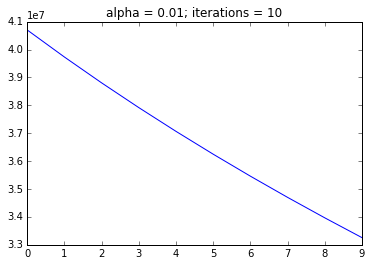

In [37]:
plot_grad_descent(.01,10)

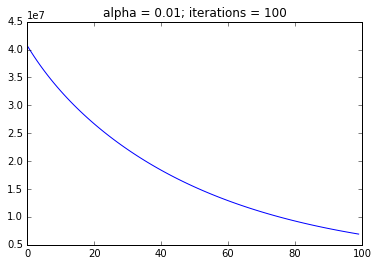

In [38]:
plot_grad_descent(.01,100)

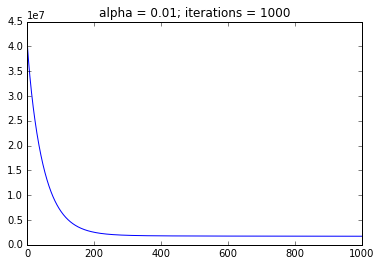

In [39]:
plot_grad_descent(.01,1000)

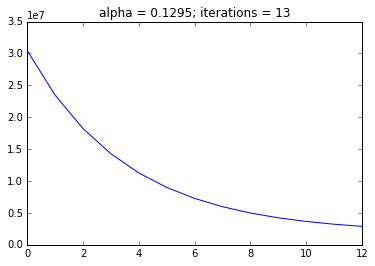

In [40]:
plot_grad_descent(.1295,13)

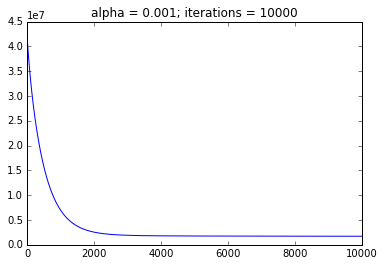

In [41]:
plot_grad_descent(.001,10000)

In [42]:
testData = X_test # populate the test dataset
testData, muTest, sigmaTest = scaleData(testData) # and normalize the test set features

In [43]:
#Add a column of ones to X (intercept term)
m = testData.shape[0]
it = np.ones(shape=(m, 1))
testData = np.append(it, testData, 1)

In [44]:
print theta

[[ 22.3721212 ]
 [ -0.87288966]
 [  0.76440812]
 [ -0.38222546]
 [  0.94172505]
 [ -1.87913519]
 [  2.16131392]
 [  0.09620015]
 [ -2.71239439]
 [  1.50134898]
 [ -0.68956173]
 [ -1.67477744]
 [  0.76888918]
 [ -4.10981531]]


In [45]:
#predicted house prices, unscaled
y_pred = (testData.dot(theta)*sigma[0]+mu[0])
print y_pred

[[ 24.35189512]
 [ 38.8269487 ]
 [ 41.45832551]
 [ 32.66385506]
 [  8.05575664]
 [ 43.10343135]
 [ 16.10825553]
 [ 24.41305877]
 [ 24.965546  ]
 [ 37.83111186]
 [ 22.69753185]
 [ 22.89411454]
 [ 17.26687101]
 [ 28.9975995 ]
 [ 21.69582351]
 [ 22.52083223]
 [ 15.45264662]
 [ 15.36310609]
 [ 20.40239341]
 [ 28.68814207]
 [ 25.64915475]
 [ 18.21767305]
 [ 31.65222985]
 [ 22.57783406]
 [ 21.13388568]
 [ 40.48114094]
 [  9.78564395]
 [ 24.31993976]
 [ 20.48910432]
 [ 27.71293563]
 [ 43.00699138]
 [ 14.95738389]
 [ 24.62713128]
 [ 24.55142637]
 [ 12.75172467]
 [ 33.9312331 ]
 [ 29.74529016]
 [ 17.28402458]
 [ 22.86170176]
 [ 19.49497664]
 [ 26.12051655]
 [ 22.63393755]
 [ 10.45714274]
 [ 32.97246804]
 [ 36.00070243]
 [ 14.73474667]
 [ 34.22033154]
 [ 34.40065499]
 [ 16.53622906]
 [ 22.78644079]
 [ 40.17302066]
 [  5.43340988]
 [ 18.49212779]
 [ 16.67778256]
 [ 21.57847935]
 [ 27.1001686 ]
 [ 18.07212599]
 [ 17.82045208]
 [ 22.07628465]
 [ 16.98423126]
 [ 36.81313636]
 [ 19.26664539]
 [ 21.15

In [46]:
print r2_score(y_test, y_pred) # R2 score of actual v/s predicted test values

0.806656717979
